# Predict CTR of an Email Campaign


Can you predict the Click Through Rate (CTR) of an email campaign?



## Problem Statement


Most organizations today rely on email campaigns for effective communication with users. Email communication is one of the popular ways to pitch products to users and build trustworthy relationships with them.

Email campaigns contain different types of CTA (Call To Action). The ultimate goal of email campaigns is to maximize the Click Through Rate (CTR).
CTR is a measure of success for email campaigns. The higher the click rate, the better your email marketing campaign is. CTR is calculated by the no. of users who clicked on at least one of the CTA divided by the total no. of users the email was delivered to.
CTR =   No. of users who clicked on at least one of the CTA / No. of emails delivered
CTR depends on multiple factors like design, content, personalization, etc. 

How do you design the email content effectively?
What should your subject line look like?
What should be the length of the email?
Do you need images in your email template?

As a part of the Data Science team, in this hackathon, you will build a smart system to predict the CTR for email campaigns and therefore identify the critical factors that will help the marketing team to maximize the CTR.

### Objective
Your task at hand is to build a machine learning-based approach to predict the CTR of an email campaign.

### Importing the Relevant Libraries

In [415]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from flaml import AutoML
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Loading and Inspecting the datasets

In [416]:
train=pd.read_csv('train_F3fUq2S.csv')
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [417]:
test=pd.read_csv('test_Bk2wfZ3.csv')
test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14


In [418]:
print(train.shape, test.shape)

(1888, 22) (762, 21)


#### We have 1888 rows and 22 columns in Train set whereas Test set has 762 rows and 21 columns.

In [419]:
train.nunique()

campaign_id           1888
sender                  12
subject_len            170
body_len              1568
mean_paragraph_len     121
day_of_week              7
is_weekend               2
times_of_day             3
category                16
product                 43
no_of_CTA               40
mean_CTA_len            79
is_image                 6
is_personalised          2
is_quote                 7
is_timer                 1
is_emoticons             6
is_discount              2
is_price                 8
is_urgency               2
target_audience         17
click_rate            1810
dtype: int64

In [420]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

#### There is no null values in the dataset

### Finding insights from the dataset with the help of plots

<AxesSubplot:xlabel='sender', ylabel='count'>

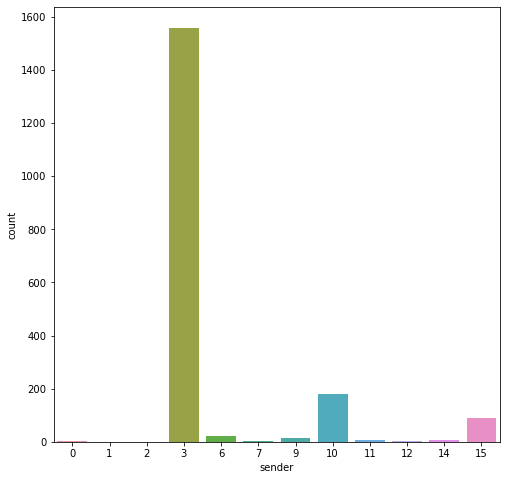

In [421]:
plt.figure(figsize=(8,8))
sns.countplot('sender', data=train)

#### Maximum emails are from sender 3

<AxesSubplot:xlabel='sender', ylabel='click_rate'>

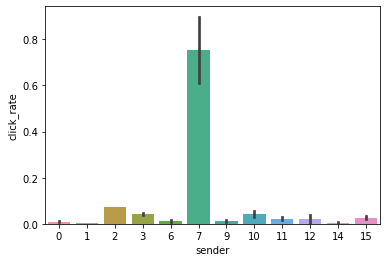

In [422]:
sns.barplot(x='sender', y='click_rate', data=train)

#### CTR of sender 7 is highest

<AxesSubplot:xlabel='subject_len', ylabel='Count'>

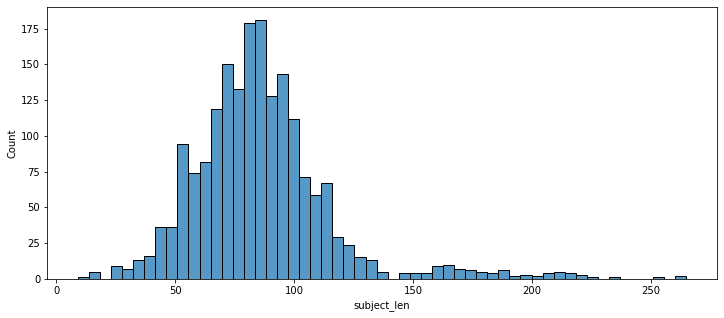

In [423]:
plt.figure(figsize=(12,5))
sns.histplot(data=train['subject_len'])

#### Most of the emails have subject_len in between 50 to 110

<AxesSubplot:xlabel='subject_len', ylabel='click_rate'>

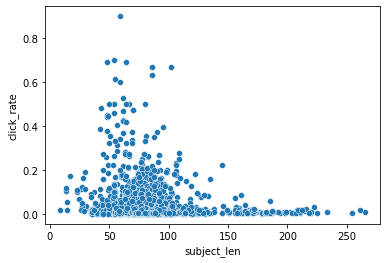

In [424]:
sns.scatterplot(x='subject_len', y='click_rate', data=train)

#### CTR is greater in range 40 to 100 subject_len

<AxesSubplot:xlabel='body_len', ylabel='Count'>

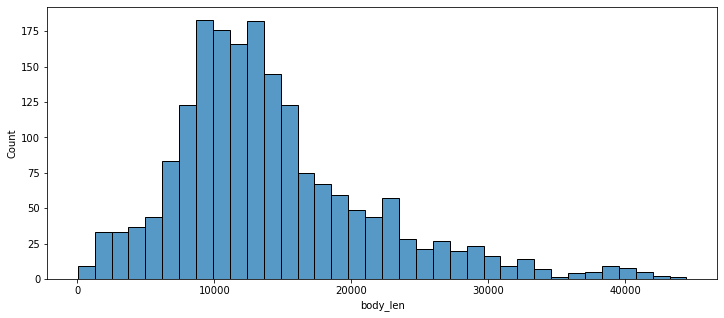

In [425]:
plt.figure(figsize=(12,5))
sns.histplot(data=train['body_len'])

#### Most of the emails have body_len in range around 8000 to 16000

<AxesSubplot:xlabel='body_len', ylabel='click_rate'>

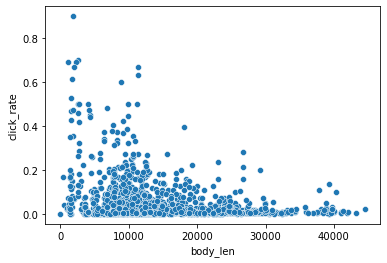

In [426]:
sns.scatterplot(x='body_len', y='click_rate', data=train)

#### CTR is greater in range around 1000 to 12000

<AxesSubplot:xlabel='mean_paragraph_len', ylabel='Count'>

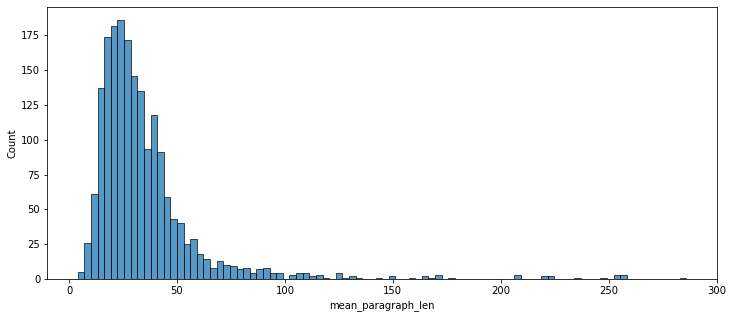

In [427]:
plt.figure(figsize=(12,5))
sns.histplot(data=train['mean_paragraph_len'])

#### The mean_paragraph_len of most of the emails are between 20 to 50

<AxesSubplot:xlabel='mean_paragraph_len', ylabel='click_rate'>

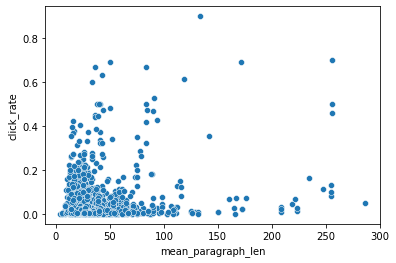

In [428]:
sns.scatterplot(x='mean_paragraph_len', y='click_rate', data=train)

### CTR is greater when mean_paragraph_len is less than 100

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

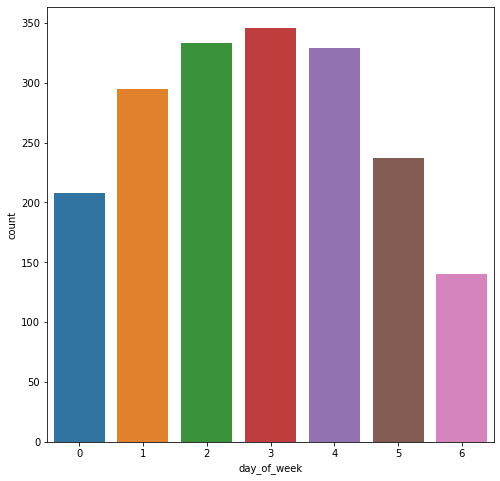

In [429]:
plt.figure(figsize=(8,8))
sns.countplot('day_of_week', data=train)

#### No. of emails on day 0 and 6 are sent less

<AxesSubplot:xlabel='day_of_week', ylabel='click_rate'>

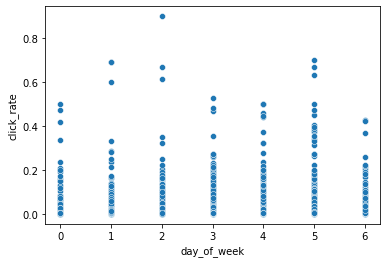

In [430]:
sns.scatterplot(x='day_of_week', y='click_rate', data=train)

#### CTR is greater on day 2 and day 5

<AxesSubplot:xlabel='times_of_day', ylabel='count'>

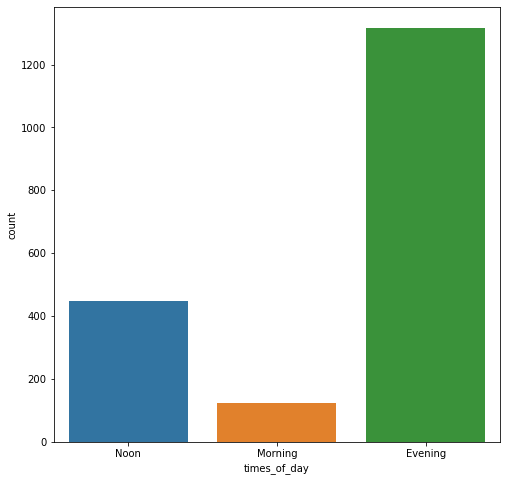

In [431]:
plt.figure(figsize=(8,8))
sns.countplot('times_of_day', data=train)

#### Most of the emails are sent in evening time of day

<AxesSubplot:xlabel='times_of_day', ylabel='click_rate'>

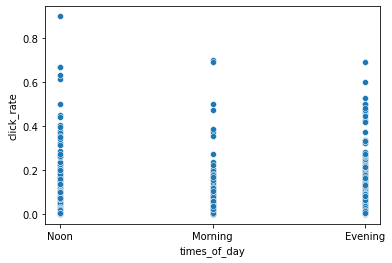

In [432]:
sns.scatterplot(x='times_of_day', y='click_rate', data=train)

#### CTR doesn't depend upon time_of day

<AxesSubplot:xlabel='is_weekend', ylabel='count'>

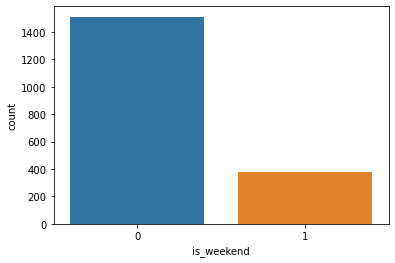

In [433]:
plt.figure()
sns.countplot('is_weekend', data=train)

#### Approx 1/4 of the mails are sent on weekends 

<AxesSubplot:xlabel='is_weekend', ylabel='click_rate'>

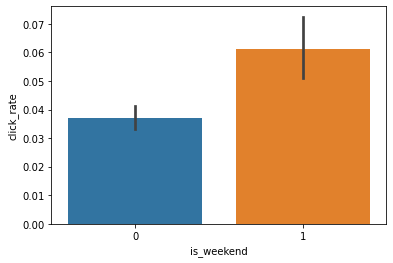

In [434]:
sns.barplot(x='is_weekend', y='click_rate', data=train)

#### CTR is greater on weekends

<AxesSubplot:xlabel='target_audience', ylabel='count'>

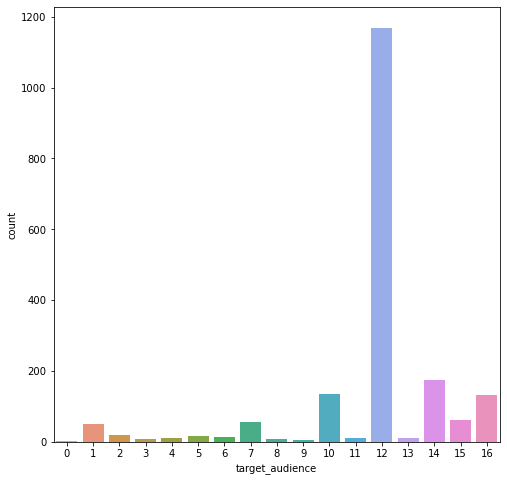

In [435]:
plt.figure(figsize=(8,8))
sns.countplot('target_audience', data=train)

#### Type 12 audience are the target of most of the email campaings

<AxesSubplot:xlabel='target_audience', ylabel='click_rate'>

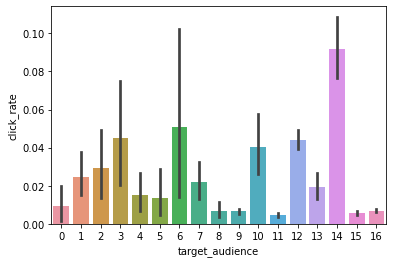

In [436]:
sns.barplot(x='target_audience', y='click_rate', data=train)

#### Type 14 and type 6 audiences has higher CTR values

<AxesSubplot:xlabel='category', ylabel='count'>

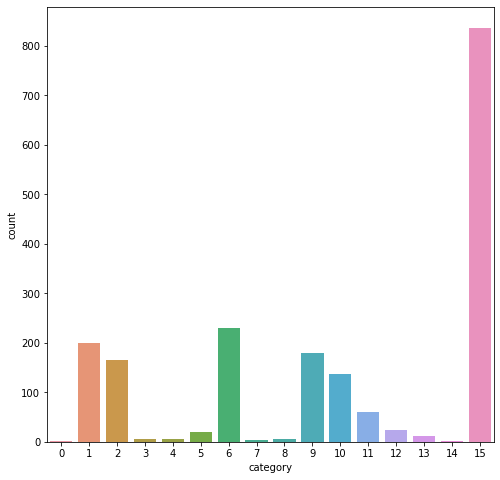

In [437]:
plt.figure(figsize=(8,8))
sns.countplot('category', data=train)

#### Most of the mails are from category 15

<AxesSubplot:xlabel='category', ylabel='click_rate'>

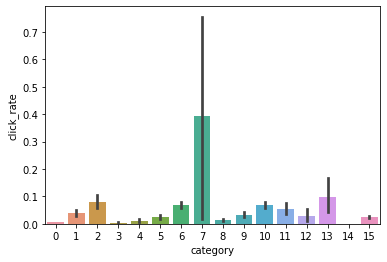

In [438]:
sns.barplot(x='category', y='click_rate', data=train)

#### Category 7 has the higher CTR

<AxesSubplot:xlabel='product', ylabel='Count'>

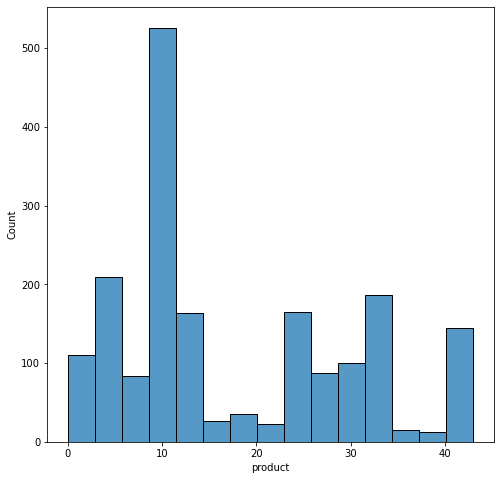

In [439]:
plt.figure(figsize=(8,8))
sns.histplot(train['product'])

<AxesSubplot:xlabel='product', ylabel='click_rate'>

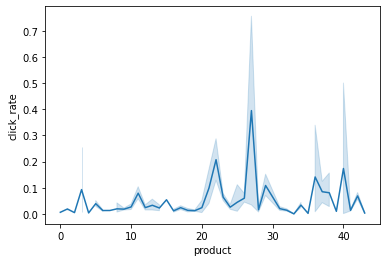

In [440]:
sns.lineplot(x='product', y='click_rate', data=train)

#### CTR is greater when product type is in between 25 to 28

<AxesSubplot:xlabel='no_of_CTA', ylabel='Count'>

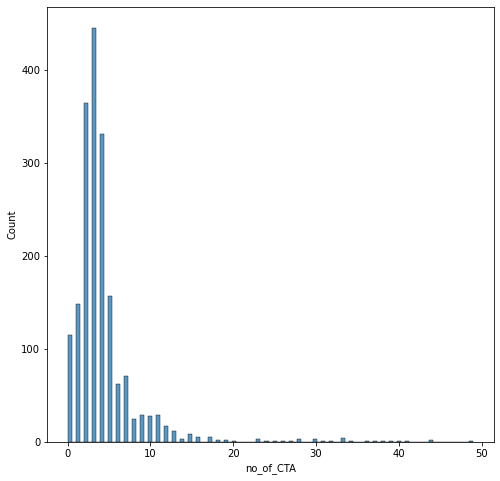

In [441]:
plt.figure(figsize=(8,8))
sns.histplot(train['no_of_CTA'])

#### no_of_CTA of most of the mails are in range of 0 to 7

<AxesSubplot:xlabel='no_of_CTA', ylabel='click_rate'>

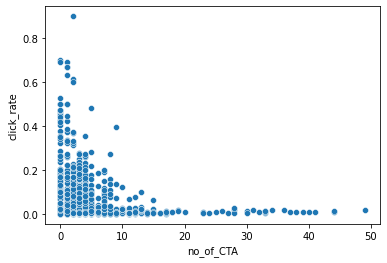

In [442]:
sns.scatterplot(x='no_of_CTA', y='click_rate', data=train)

#### CTR is greater when no_of_CTA is less (between 0 to 5)

<AxesSubplot:xlabel='mean_CTA_len', ylabel='Count'>

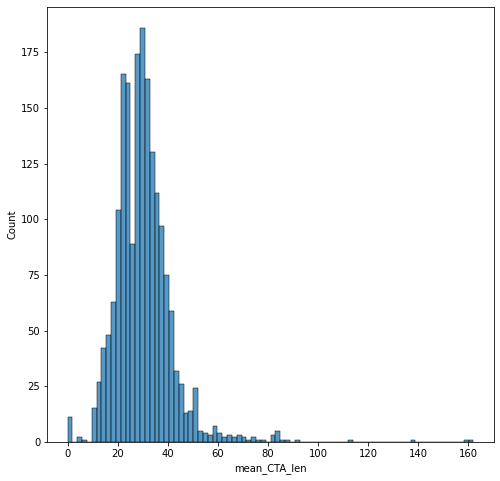

In [443]:
plt.figure(figsize=(8,8))
sns.histplot(train['mean_CTA_len'])

#### Most of the emails have mean_CTA_len of around 20 to 40

<AxesSubplot:xlabel='mean_CTA_len', ylabel='click_rate'>

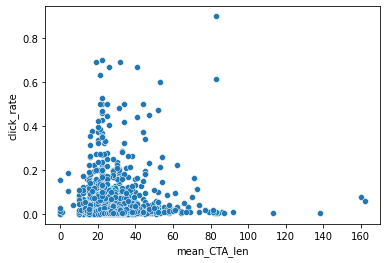

In [444]:
sns.scatterplot(x='mean_CTA_len', y='click_rate', data=train)

#### CTR is maximum when mean_CTA_len is between 15 to 40

<AxesSubplot:xlabel='is_image', ylabel='count'>

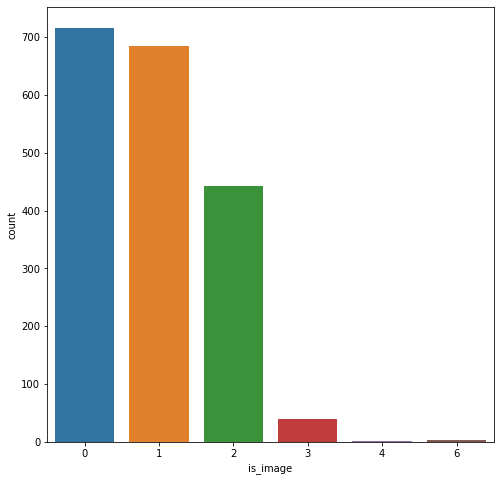

In [445]:
plt.figure(figsize=(8,8))
sns.countplot(train['is_image'])

#### Most of the emails have 0, 1 or 2 images

<AxesSubplot:xlabel='is_image', ylabel='click_rate'>

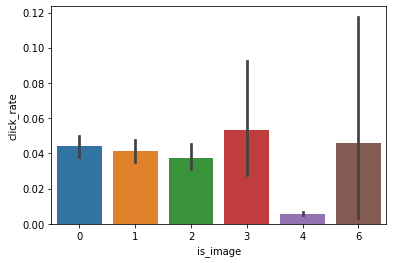

In [446]:
sns.barplot(x='is_image', y='click_rate', data=train)

#### CTR is low when there are 4 images

<AxesSubplot:xlabel='is_personalised', ylabel='count'>

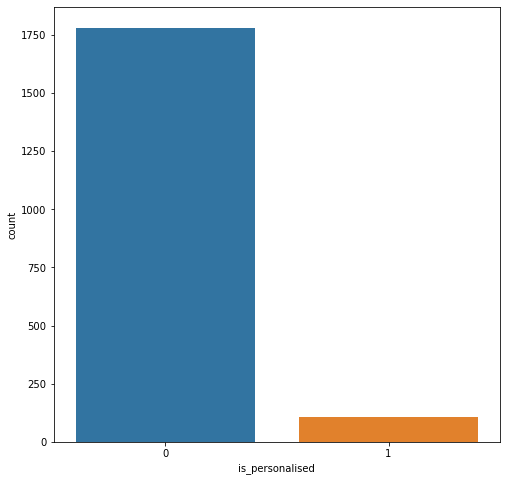

In [447]:
plt.figure(figsize=(8,8))
sns.countplot(train['is_personalised'])

#### Most of the emails are not personalised

<AxesSubplot:xlabel='is_personalised', ylabel='click_rate'>

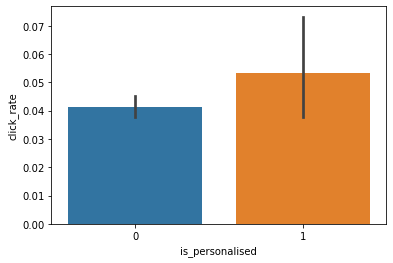

In [448]:
sns.barplot(x='is_personalised', y='click_rate', data=train)

#### CTR doesn't depend much on personalisation of emails

<AxesSubplot:xlabel='is_quote', ylabel='count'>

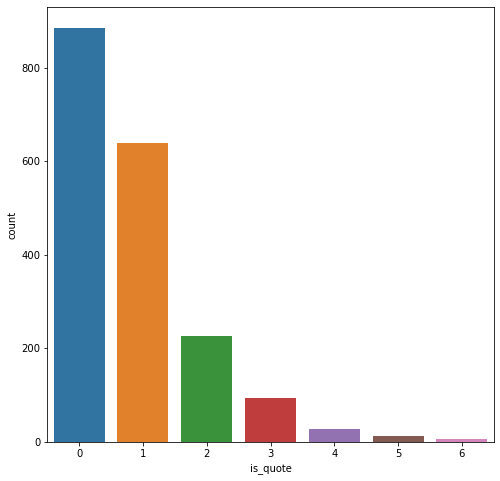

In [449]:
plt.figure(figsize=(8,8))
sns.countplot(train['is_quote'])

#### Most of the emails have 0 or 1 quotes

<AxesSubplot:xlabel='is_quote', ylabel='click_rate'>

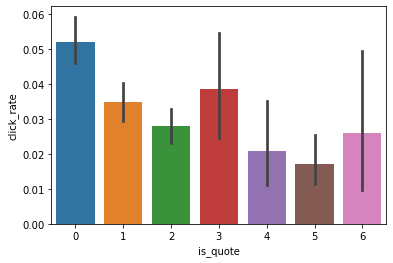

In [450]:
sns.barplot(x='is_quote', y='click_rate', data=train)

#### CTR decreases when no. of quotes decreases

<AxesSubplot:xlabel='is_timer', ylabel='count'>

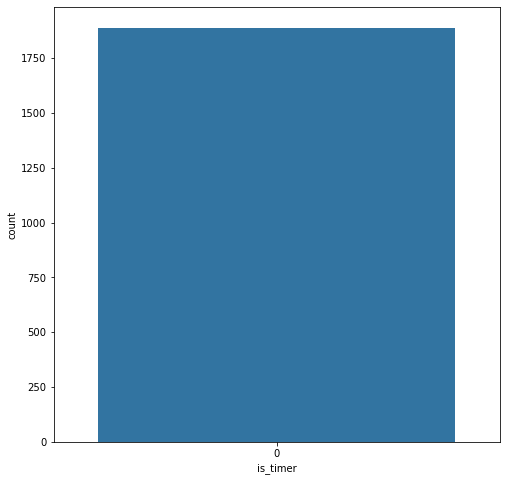

In [451]:
plt.figure(figsize=(8,8))
sns.countplot(train['is_timer'])

#### All of the mails don't have any timer

<AxesSubplot:xlabel='is_timer', ylabel='click_rate'>

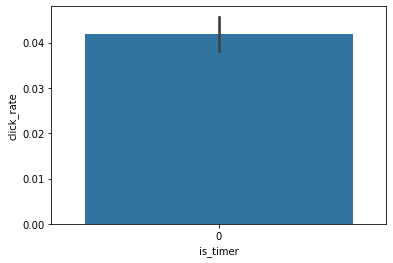

In [452]:
sns.barplot(x='is_timer', y='click_rate', data=train)

#### CTR does not depend on timer

<AxesSubplot:xlabel='is_emoticons', ylabel='count'>

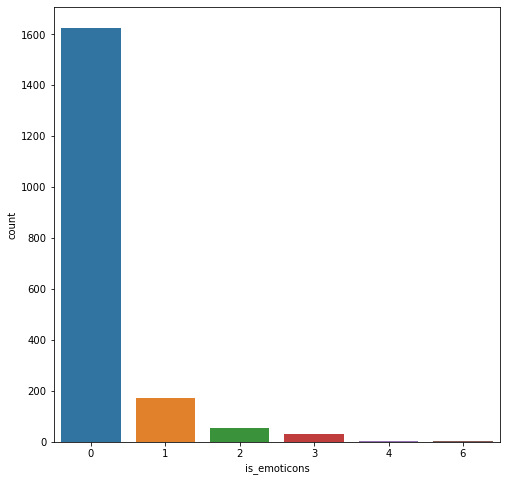

In [453]:
plt.figure(figsize=(8,8))
sns.countplot(train['is_emoticons'])

#### Most of the emails have 0 emoticons

<AxesSubplot:xlabel='is_emoticons', ylabel='click_rate'>

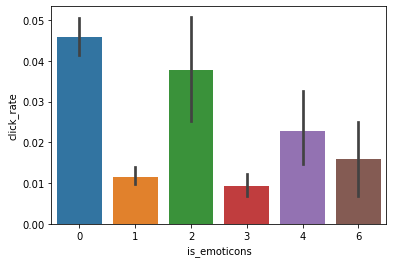

In [454]:
sns.barplot(x='is_emoticons', y='click_rate', data=train)

#### CTR decreases when no. of emoticons increases

<AxesSubplot:xlabel='is_discount', ylabel='count'>

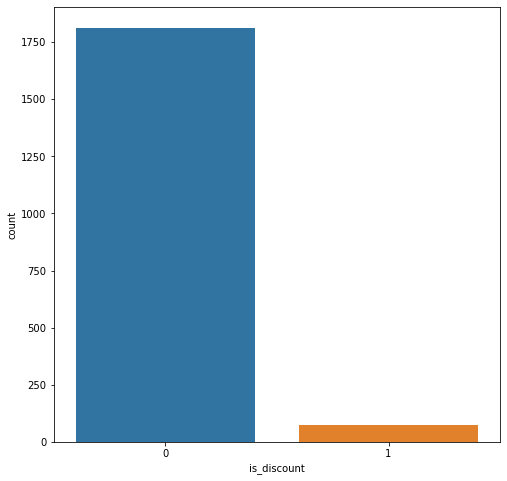

In [455]:
plt.figure(figsize=(8,8))
sns.countplot(train['is_discount'])

#### Most of the emails does not have discounts

<AxesSubplot:xlabel='is_discount', ylabel='click_rate'>

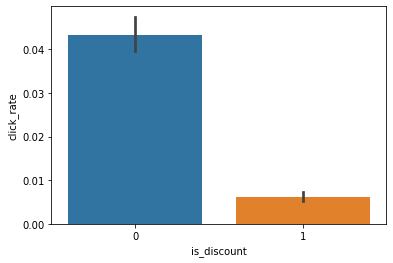

In [456]:
sns.barplot(x='is_discount', y='click_rate', data=train)

#### CTR is greater when it's not discount email

<AxesSubplot:xlabel='is_price', ylabel='count'>

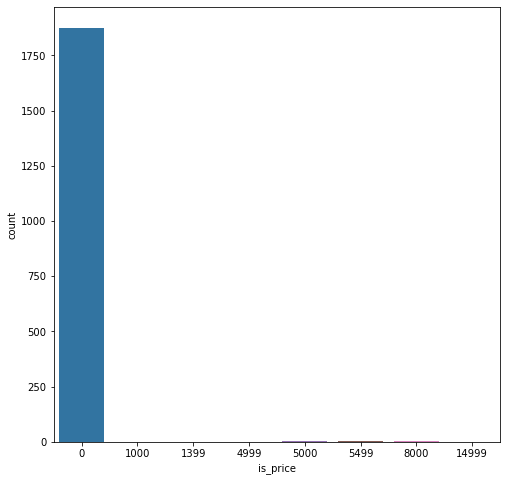

In [457]:
plt.figure(figsize=(8,8))
sns.countplot(train['is_price'])

#### Most of the emails does not have any price

<AxesSubplot:xlabel='is_price', ylabel='click_rate'>

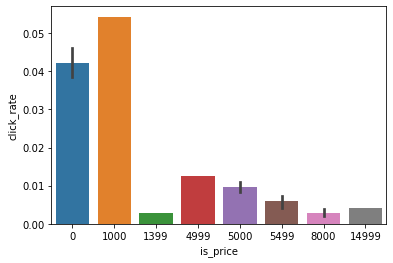

In [458]:
sns.barplot(x='is_price', y='click_rate', data=train)

#### CTR is maximum when price is less than or equal to 1000

<AxesSubplot:xlabel='is_urgency', ylabel='count'>

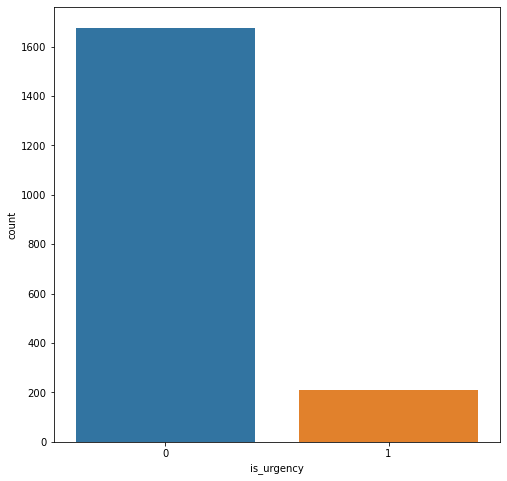

In [459]:
plt.figure(figsize=(8,8))
sns.countplot(train['is_urgency'])

#### Most of the emails are not in urgency

<AxesSubplot:xlabel='is_urgency', ylabel='click_rate'>

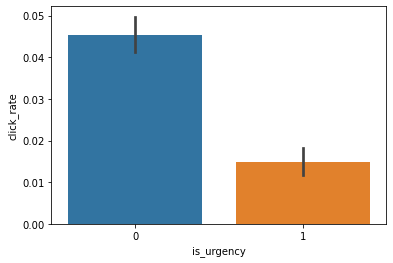

In [460]:
sns.barplot(x='is_urgency', y='click_rate', data=train)

#### CTR is greater when emails are not in urgency

### Dropping the columns that doesn't affect the CTR

In [461]:
train=train.drop(['is_timer','campaign_id', 'is_personalised', 'times_of_day'],axis=1)
train.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,3,76,10439,39,5,1,6,26,3,29,0,0,0,0,0,0,14,0.103079
1,3,54,2570,256,5,1,2,11,0,22,0,0,0,0,0,0,10,0.700000
2,3,59,12801,16,5,1,2,11,3,23,1,1,0,0,0,0,16,0.002769
3,3,74,11037,30,4,0,15,9,4,24,0,0,0,0,0,0,10,0.010868
4,3,80,10011,27,5,1,6,26,3,31,0,1,0,0,0,0,14,0.142826


In [462]:
test=test.drop(['is_timer','campaign_id','is_personalised', 'times_of_day'],axis=1)
test.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,3,61,12871,11,6,1,6,26,3,37,1,0,1,0,0,0,14
1,3,54,2569,256,5,1,2,11,0,22,0,0,0,0,0,0,10
2,3,88,1473,78,4,0,2,11,0,22,1,1,0,0,0,0,10
3,3,88,1473,78,3,0,2,11,0,22,1,1,0,0,0,0,10
4,3,78,9020,29,3,0,6,26,2,40,0,0,0,0,0,0,14


### Building Model

In [463]:
y = train.pop('click_rate')
X = train

In [464]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [465]:
automl = AutoML()

In [466]:
automl.fit(X_train, y_train, task="regression",metric='r2',time_budget=900)

[flaml.automl: 08-07 21:01:23] {2444} INFO - task = regression
[flaml.automl: 08-07 21:01:23] {2446} INFO - Data split method: uniform
[flaml.automl: 08-07 21:01:23] {2449} INFO - Evaluation method: cv
[flaml.automl: 08-07 21:01:23] {2568} INFO - Minimizing error metric: 1-r2
[flaml.automl: 08-07 21:01:23] {2708} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 08-07 21:01:23] {3010} INFO - iteration 0, current learner lgbm
[flaml.automl: 08-07 21:01:23] {3143} INFO - Estimated sufficient time budget=411s. Estimated necessary time budget=3s.
[flaml.automl: 08-07 21:01:23] {3190} INFO -  at 0.1s,	estimator lgbm's best error=0.9028,	best estimator lgbm's best error=0.9028
[flaml.automl: 08-07 21:01:23] {3010} INFO - iteration 1, current learner lgbm
[flaml.automl: 08-07 21:01:23] {3190} INFO -  at 0.1s,	estimator lgbm's best error=0.9028,	best estimator lgbm's best error=0.9028
[flaml.automl: 08-07 21:01:23] {3010} INFO - 

[flaml.automl: 08-07 21:01:27] {3190} INFO -  at 3.6s,	estimator extra_tree's best error=0.5926,	best estimator lgbm's best error=0.5616
[flaml.automl: 08-07 21:01:27] {3010} INFO - iteration 37, current learner rf
[flaml.automl: 08-07 21:01:27] {3190} INFO -  at 3.8s,	estimator rf's best error=0.5769,	best estimator lgbm's best error=0.5616
[flaml.automl: 08-07 21:01:27] {3010} INFO - iteration 38, current learner extra_tree
[flaml.automl: 08-07 21:01:27] {3190} INFO -  at 3.9s,	estimator extra_tree's best error=0.5926,	best estimator lgbm's best error=0.5616
[flaml.automl: 08-07 21:01:27] {3010} INFO - iteration 39, current learner lgbm
[flaml.automl: 08-07 21:01:27] {3190} INFO -  at 4.0s,	estimator lgbm's best error=0.5616,	best estimator lgbm's best error=0.5616
[flaml.automl: 08-07 21:01:27] {3010} INFO - iteration 40, current learner extra_tree
[flaml.automl: 08-07 21:01:28] {3190} INFO -  at 4.3s,	estimator extra_tree's best error=0.5663,	best estimator lgbm's best error=0.5616

[flaml.automl: 08-07 21:01:40] {3010} INFO - iteration 73, current learner xgb_limitdepth
[flaml.automl: 08-07 21:01:41] {3190} INFO -  at 17.3s,	estimator xgb_limitdepth's best error=0.5556,	best estimator extra_tree's best error=0.4940
[flaml.automl: 08-07 21:01:41] {3010} INFO - iteration 74, current learner extra_tree
[flaml.automl: 08-07 21:01:41] {3190} INFO -  at 18.0s,	estimator extra_tree's best error=0.4940,	best estimator extra_tree's best error=0.4940
[flaml.automl: 08-07 21:01:41] {3010} INFO - iteration 75, current learner xgb_limitdepth
[flaml.automl: 08-07 21:01:41] {3190} INFO -  at 18.1s,	estimator xgb_limitdepth's best error=0.5377,	best estimator extra_tree's best error=0.4940
[flaml.automl: 08-07 21:01:41] {3010} INFO - iteration 76, current learner xgboost
[flaml.automl: 08-07 21:01:41] {3190} INFO -  at 18.2s,	estimator xgboost's best error=0.6104,	best estimator extra_tree's best error=0.4940
[flaml.automl: 08-07 21:01:41] {3010} INFO - iteration 77, current lea

[flaml.automl: 08-07 21:01:54] {3010} INFO - iteration 109, current learner xgb_limitdepth
[flaml.automl: 08-07 21:01:55] {3190} INFO -  at 31.2s,	estimator xgb_limitdepth's best error=0.5377,	best estimator extra_tree's best error=0.4940
[flaml.automl: 08-07 21:01:55] {3010} INFO - iteration 110, current learner extra_tree
[flaml.automl: 08-07 21:01:57] {3190} INFO -  at 33.3s,	estimator extra_tree's best error=0.4937,	best estimator extra_tree's best error=0.4937
[flaml.automl: 08-07 21:01:57] {3010} INFO - iteration 111, current learner lgbm
[flaml.automl: 08-07 21:01:57] {3190} INFO -  at 33.4s,	estimator lgbm's best error=0.5557,	best estimator extra_tree's best error=0.4937
[flaml.automl: 08-07 21:01:57] {3010} INFO - iteration 112, current learner xgb_limitdepth
[flaml.automl: 08-07 21:01:57] {3190} INFO -  at 33.6s,	estimator xgb_limitdepth's best error=0.5243,	best estimator extra_tree's best error=0.4937
[flaml.automl: 08-07 21:01:57] {3010} INFO - iteration 113, current lear

[flaml.automl: 08-07 21:02:18] {3010} INFO - iteration 145, current learner xgboost
[flaml.automl: 08-07 21:02:19] {3190} INFO -  at 55.4s,	estimator xgboost's best error=0.5397,	best estimator extra_tree's best error=0.4937
[flaml.automl: 08-07 21:02:19] {3010} INFO - iteration 146, current learner rf
[flaml.automl: 08-07 21:02:23] {3190} INFO -  at 59.3s,	estimator rf's best error=0.5063,	best estimator extra_tree's best error=0.4937
[flaml.automl: 08-07 21:02:23] {3010} INFO - iteration 147, current learner rf
[flaml.automl: 08-07 21:02:25] {3190} INFO -  at 61.3s,	estimator rf's best error=0.5063,	best estimator extra_tree's best error=0.4937
[flaml.automl: 08-07 21:02:25] {3010} INFO - iteration 148, current learner rf
[flaml.automl: 08-07 21:02:32] {3190} INFO -  at 68.6s,	estimator rf's best error=0.5063,	best estimator extra_tree's best error=0.4937
[flaml.automl: 08-07 21:02:32] {3010} INFO - iteration 149, current learner lgbm
[flaml.automl: 08-07 21:02:32] {3190} INFO -  at 

[flaml.automl: 08-07 21:03:12] {3190} INFO -  at 109.0s,	estimator xgb_limitdepth's best error=0.4635,	best estimator xgb_limitdepth's best error=0.4635
[flaml.automl: 08-07 21:03:12] {3010} INFO - iteration 181, current learner xgb_limitdepth
[flaml.automl: 08-07 21:03:16] {3190} INFO -  at 113.1s,	estimator xgb_limitdepth's best error=0.4635,	best estimator xgb_limitdepth's best error=0.4635
[flaml.automl: 08-07 21:03:16] {3010} INFO - iteration 182, current learner xgboost
[flaml.automl: 08-07 21:03:17] {3190} INFO -  at 113.3s,	estimator xgboost's best error=0.5397,	best estimator xgb_limitdepth's best error=0.4635
[flaml.automl: 08-07 21:03:17] {3010} INFO - iteration 183, current learner lgbm
[flaml.automl: 08-07 21:03:17] {3190} INFO -  at 113.4s,	estimator lgbm's best error=0.5557,	best estimator xgb_limitdepth's best error=0.4635
[flaml.automl: 08-07 21:03:17] {3010} INFO - iteration 184, current learner xgboost
[flaml.automl: 08-07 21:03:17] {3190} INFO -  at 113.7s,	estimato

[flaml.automl: 08-07 21:04:05] {3190} INFO -  at 161.7s,	estimator lgbm's best error=0.5389,	best estimator xgb_limitdepth's best error=0.4635
[flaml.automl: 08-07 21:04:05] {3010} INFO - iteration 216, current learner xgb_limitdepth
[flaml.automl: 08-07 21:04:06] {3190} INFO -  at 162.6s,	estimator xgb_limitdepth's best error=0.4635,	best estimator xgb_limitdepth's best error=0.4635
[flaml.automl: 08-07 21:04:06] {3010} INFO - iteration 217, current learner lgbm
[flaml.automl: 08-07 21:04:06] {3190} INFO -  at 163.2s,	estimator lgbm's best error=0.5389,	best estimator xgb_limitdepth's best error=0.4635
[flaml.automl: 08-07 21:04:06] {3010} INFO - iteration 218, current learner lgbm
[flaml.automl: 08-07 21:04:07] {3190} INFO -  at 163.6s,	estimator lgbm's best error=0.5389,	best estimator xgb_limitdepth's best error=0.4635
[flaml.automl: 08-07 21:04:07] {3010} INFO - iteration 219, current learner lgbm
[flaml.automl: 08-07 21:04:07] {3190} INFO -  at 163.7s,	estimator lgbm's best error

[flaml.automl: 08-07 21:04:50] {3010} INFO - iteration 251, current learner rf
[flaml.automl: 08-07 21:04:51] {3190} INFO -  at 208.0s,	estimator rf's best error=0.5043,	best estimator xgb_limitdepth's best error=0.4635
[flaml.automl: 08-07 21:04:51] {3010} INFO - iteration 252, current learner xgboost
[flaml.automl: 08-07 21:04:52] {3190} INFO -  at 208.8s,	estimator xgboost's best error=0.4867,	best estimator xgb_limitdepth's best error=0.4635
[flaml.automl: 08-07 21:04:52] {3010} INFO - iteration 253, current learner xgboost
[flaml.automl: 08-07 21:04:53] {3190} INFO -  at 209.6s,	estimator xgboost's best error=0.4867,	best estimator xgb_limitdepth's best error=0.4635
[flaml.automl: 08-07 21:04:53] {3010} INFO - iteration 254, current learner xgb_limitdepth
[flaml.automl: 08-07 21:04:56] {3190} INFO -  at 213.1s,	estimator xgb_limitdepth's best error=0.4635,	best estimator xgb_limitdepth's best error=0.4635
[flaml.automl: 08-07 21:04:56] {3010} INFO - iteration 255, current learner 

[flaml.automl: 08-07 21:05:44] {3010} INFO - iteration 286, current learner xgb_limitdepth
[flaml.automl: 08-07 21:05:47] {3190} INFO -  at 263.9s,	estimator xgb_limitdepth's best error=0.4585,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:05:47] {3010} INFO - iteration 287, current learner xgb_limitdepth
[flaml.automl: 08-07 21:05:48] {3190} INFO -  at 265.0s,	estimator xgb_limitdepth's best error=0.4585,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:05:48] {3010} INFO - iteration 288, current learner xgboost
[flaml.automl: 08-07 21:05:50] {3190} INFO -  at 267.0s,	estimator xgboost's best error=0.4867,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:05:50] {3010} INFO - iteration 289, current learner xgboost
[flaml.automl: 08-07 21:05:51] {3190} INFO -  at 267.4s,	estimator xgboost's best error=0.4867,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:05:51] {3010} INFO - iterati

[flaml.automl: 08-07 21:07:02] {3010} INFO - iteration 321, current learner xgb_limitdepth
[flaml.automl: 08-07 21:07:03] {3190} INFO -  at 340.0s,	estimator xgb_limitdepth's best error=0.4585,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:07:03] {3010} INFO - iteration 322, current learner xgboost
[flaml.automl: 08-07 21:07:04] {3190} INFO -  at 340.9s,	estimator xgboost's best error=0.4765,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:07:04] {3010} INFO - iteration 323, current learner xgboost
[flaml.automl: 08-07 21:07:05] {3190} INFO -  at 341.9s,	estimator xgboost's best error=0.4765,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:07:05] {3010} INFO - iteration 324, current learner xgb_limitdepth
[flaml.automl: 08-07 21:07:08] {3190} INFO -  at 344.5s,	estimator xgb_limitdepth's best error=0.4585,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:07:08] {3010} INFO - iterati

[flaml.automl: 08-07 21:08:09] {3010} INFO - iteration 356, current learner xgb_limitdepth
[flaml.automl: 08-07 21:08:12] {3190} INFO -  at 409.0s,	estimator xgb_limitdepth's best error=0.4585,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:08:12] {3010} INFO - iteration 357, current learner xgboost
[flaml.automl: 08-07 21:08:13] {3190} INFO -  at 409.5s,	estimator xgboost's best error=0.4765,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:08:13] {3010} INFO - iteration 358, current learner xgboost
[flaml.automl: 08-07 21:08:14] {3190} INFO -  at 411.1s,	estimator xgboost's best error=0.4765,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:08:14] {3010} INFO - iteration 359, current learner xgb_limitdepth
[flaml.automl: 08-07 21:08:17] {3190} INFO -  at 413.5s,	estimator xgb_limitdepth's best error=0.4585,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:08:17] {3010} INFO - iterati

[flaml.automl: 08-07 21:09:11] {3010} INFO - iteration 391, current learner xgb_limitdepth
[flaml.automl: 08-07 21:09:13] {3190} INFO -  at 469.6s,	estimator xgb_limitdepth's best error=0.4585,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:09:13] {3010} INFO - iteration 392, current learner xgboost
[flaml.automl: 08-07 21:09:14] {3190} INFO -  at 470.2s,	estimator xgboost's best error=0.4765,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:09:14] {3010} INFO - iteration 393, current learner lgbm
[flaml.automl: 08-07 21:09:14] {3190} INFO -  at 470.8s,	estimator lgbm's best error=0.5328,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:09:14] {3010} INFO - iteration 394, current learner xgboost
[flaml.automl: 08-07 21:09:16] {3190} INFO -  at 472.4s,	estimator xgboost's best error=0.4765,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:09:16] {3010} INFO - iteration 395, current lear

[flaml.automl: 08-07 21:10:08] {3010} INFO - iteration 426, current learner lgbm
[flaml.automl: 08-07 21:10:11] {3190} INFO -  at 528.1s,	estimator lgbm's best error=0.5328,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:10:11] {3010} INFO - iteration 427, current learner lgbm
[flaml.automl: 08-07 21:10:17] {3190} INFO -  at 534.1s,	estimator lgbm's best error=0.5328,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:10:17] {3010} INFO - iteration 428, current learner lgbm
[flaml.automl: 08-07 21:10:18] {3190} INFO -  at 534.6s,	estimator lgbm's best error=0.5202,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:10:18] {3010} INFO - iteration 429, current learner xgboost
[flaml.automl: 08-07 21:10:19] {3190} INFO -  at 535.7s,	estimator xgboost's best error=0.4765,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:10:19] {3010} INFO - iteration 430, current learner lgbm
[flaml.automl: 08

[flaml.automl: 08-07 21:11:04] {3190} INFO -  at 580.5s,	estimator xgb_limitdepth's best error=0.4585,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:11:04] {3010} INFO - iteration 462, current learner lgbm
[flaml.automl: 08-07 21:11:05] {3190} INFO -  at 581.6s,	estimator lgbm's best error=0.5104,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:11:05] {3010} INFO - iteration 463, current learner lgbm
[flaml.automl: 08-07 21:11:05] {3190} INFO -  at 582.0s,	estimator lgbm's best error=0.5104,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:11:05] {3010} INFO - iteration 464, current learner lgbm
[flaml.automl: 08-07 21:11:12] {3190} INFO -  at 588.6s,	estimator lgbm's best error=0.5104,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:11:12] {3010} INFO - iteration 465, current learner lgbm
[flaml.automl: 08-07 21:11:16] {3190} INFO -  at 592.7s,	estimator lgbm's best error=0.5104,	b

[flaml.automl: 08-07 21:12:16] {3010} INFO - iteration 497, current learner xgboost
[flaml.automl: 08-07 21:12:18] {3190} INFO -  at 654.7s,	estimator xgboost's best error=0.4765,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:12:18] {3010} INFO - iteration 498, current learner lgbm
[flaml.automl: 08-07 21:12:20] {3190} INFO -  at 656.7s,	estimator lgbm's best error=0.5104,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:12:20] {3010} INFO - iteration 499, current learner xgboost
[flaml.automl: 08-07 21:12:21] {3190} INFO -  at 657.8s,	estimator xgboost's best error=0.4765,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:12:21] {3010} INFO - iteration 500, current learner xgb_limitdepth
[flaml.automl: 08-07 21:12:25] {3190} INFO -  at 662.2s,	estimator xgb_limitdepth's best error=0.4585,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:12:25] {3010} INFO - iteration 501, current lear

[flaml.automl: 08-07 21:13:22] {3010} INFO - iteration 532, current learner lgbm
[flaml.automl: 08-07 21:13:22] {3190} INFO -  at 719.2s,	estimator lgbm's best error=0.5104,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:13:22] {3010} INFO - iteration 533, current learner xgboost
[flaml.automl: 08-07 21:13:25] {3190} INFO -  at 722.1s,	estimator xgboost's best error=0.4765,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:13:25] {3010} INFO - iteration 534, current learner xgboost
[flaml.automl: 08-07 21:13:26] {3190} INFO -  at 722.7s,	estimator xgboost's best error=0.4765,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:13:26] {3010} INFO - iteration 535, current learner xgb_limitdepth
[flaml.automl: 08-07 21:13:28] {3190} INFO -  at 724.3s,	estimator xgb_limitdepth's best error=0.4585,	best estimator xgb_limitdepth's best error=0.4585
[flaml.automl: 08-07 21:13:28] {3010} INFO - iteration 536, current lear

[flaml.automl: 08-07 21:14:24] {3190} INFO -  at 780.9s,	estimator xgb_limitdepth's best error=0.4579,	best estimator xgb_limitdepth's best error=0.4579
[flaml.automl: 08-07 21:14:24] {3010} INFO - iteration 568, current learner lgbm
[flaml.automl: 08-07 21:14:28] {3190} INFO -  at 784.3s,	estimator lgbm's best error=0.5104,	best estimator xgb_limitdepth's best error=0.4579
[flaml.automl: 08-07 21:14:28] {3010} INFO - iteration 569, current learner xgb_limitdepth
[flaml.automl: 08-07 21:14:29] {3190} INFO -  at 786.0s,	estimator xgb_limitdepth's best error=0.4579,	best estimator xgb_limitdepth's best error=0.4579
[flaml.automl: 08-07 21:14:29] {3010} INFO - iteration 570, current learner xgb_limitdepth
[flaml.automl: 08-07 21:14:32] {3190} INFO -  at 788.4s,	estimator xgb_limitdepth's best error=0.4579,	best estimator xgb_limitdepth's best error=0.4579
[flaml.automl: 08-07 21:14:32] {3010} INFO - iteration 571, current learner xgboost
[flaml.automl: 08-07 21:14:35] {3190} INFO -  at 79

[flaml.automl: 08-07 21:15:13] {3190} INFO -  at 830.1s,	estimator xgboost's best error=0.4765,	best estimator xgb_limitdepth's best error=0.4579
[flaml.automl: 08-07 21:15:13] {3010} INFO - iteration 603, current learner lgbm
[flaml.automl: 08-07 21:15:18] {3190} INFO -  at 834.2s,	estimator lgbm's best error=0.5104,	best estimator xgb_limitdepth's best error=0.4579
[flaml.automl: 08-07 21:15:18] {3010} INFO - iteration 604, current learner lgbm
[flaml.automl: 08-07 21:15:18] {3190} INFO -  at 834.9s,	estimator lgbm's best error=0.5104,	best estimator xgb_limitdepth's best error=0.4579
[flaml.automl: 08-07 21:15:18] {3010} INFO - iteration 605, current learner xgb_limitdepth
[flaml.automl: 08-07 21:15:19] {3190} INFO -  at 835.9s,	estimator xgb_limitdepth's best error=0.4579,	best estimator xgb_limitdepth's best error=0.4579
[flaml.automl: 08-07 21:15:19] {3010} INFO - iteration 606, current learner xgb_limitdepth
[flaml.automl: 08-07 21:15:20] {3190} INFO -  at 836.6s,	estimator xgb_

[flaml.automl: 08-07 21:16:03] {3190} INFO -  at 879.3s,	estimator xgb_limitdepth's best error=0.4579,	best estimator xgb_limitdepth's best error=0.4579
[flaml.automl: 08-07 21:16:03] {3010} INFO - iteration 638, current learner xgboost
[flaml.automl: 08-07 21:16:07] {3190} INFO -  at 884.0s,	estimator xgboost's best error=0.4765,	best estimator xgb_limitdepth's best error=0.4579
[flaml.automl: 08-07 21:16:07] {3010} INFO - iteration 639, current learner xgb_limitdepth
[flaml.automl: 08-07 21:16:09] {3190} INFO -  at 885.8s,	estimator xgb_limitdepth's best error=0.4579,	best estimator xgb_limitdepth's best error=0.4579
[flaml.automl: 08-07 21:16:09] {3010} INFO - iteration 640, current learner lgbm
[flaml.automl: 08-07 21:16:16] {3190} INFO -  at 892.7s,	estimator lgbm's best error=0.5104,	best estimator xgb_limitdepth's best error=0.4579
[flaml.automl: 08-07 21:16:16] {3010} INFO - iteration 641, current learner xgb_limitdepth
[flaml.automl: 08-07 21:16:17] {3190} INFO -  at 893.6s,	e

In [467]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best r2 on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: xgb_limitdepth
Best hyperparmeter config: {'n_estimators': 257, 'max_depth': 7, 'min_child_weight': 1.9580470943708284, 'learning_rate': 0.07788504196896696, 'subsample': 0.9095003488396196, 'colsample_bylevel': 0.7187132620741817, 'colsample_bytree': 1.0, 'reg_alpha': 0.14873684338460816, 'reg_lambda': 0.05453892478102792}
Best r2 on validation data: 0.5421
Training duration of best run: 0.2879 s


In [468]:
from flaml.ml import sklearn_metric_loss_score
print('train r2', '=', 1-sklearn_metric_loss_score('r2', automl.predict(X_train), y_train))
print('test r2', '=', 1-sklearn_metric_loss_score('r2', automl.predict(X_test), y_test))

train r2 = 0.9649771192197896
test r2 = 0.4927180718922842


In [469]:
y_pred = automl.predict(test)
y_pred[:5]

array([0.04199153, 0.5766126 , 0.10384794, 0.09990606, 0.12296381],
      dtype=float32)

In [470]:
df = pd.DataFrame(y_pred,columns=['click_rate'])
df.head()

,click_rate
0,0.041992
1,0.576613
2,0.103848
3,0.099906
4,0.122964


In [471]:
submission=pd.read_csv('sample_submission_LJ2N3ZQ.csv')
submission.head()

,campaign_id,click_rate
0,1889,0.043454
1,1890,0.043454
2,1891,0.043454
3,1892,0.043454
4,1893,0.043454


In [472]:
submission['click_rate']=df['click_rate'].apply(lambda x: 0 if x<0 else x)
submission.head()

,campaign_id,click_rate
0,1889,0.041992
1,1890,0.576613
2,1891,0.103848
3,1892,0.099906
4,1893,0.122964


In [473]:
submission.to_csv('my_submission55.csv', index=False)